<a href="https://colab.research.google.com/github/ThrishapriyaSelvaraj/cs666student/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

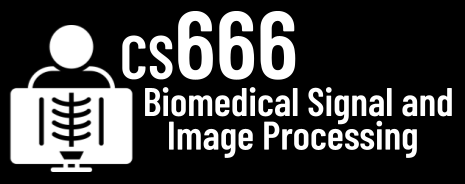
#Assignment 5

In [ ]:
# NAME: THRISHAPRIYA SELVARAJ

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [66]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [67]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: YOUR_ANSWER

220

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

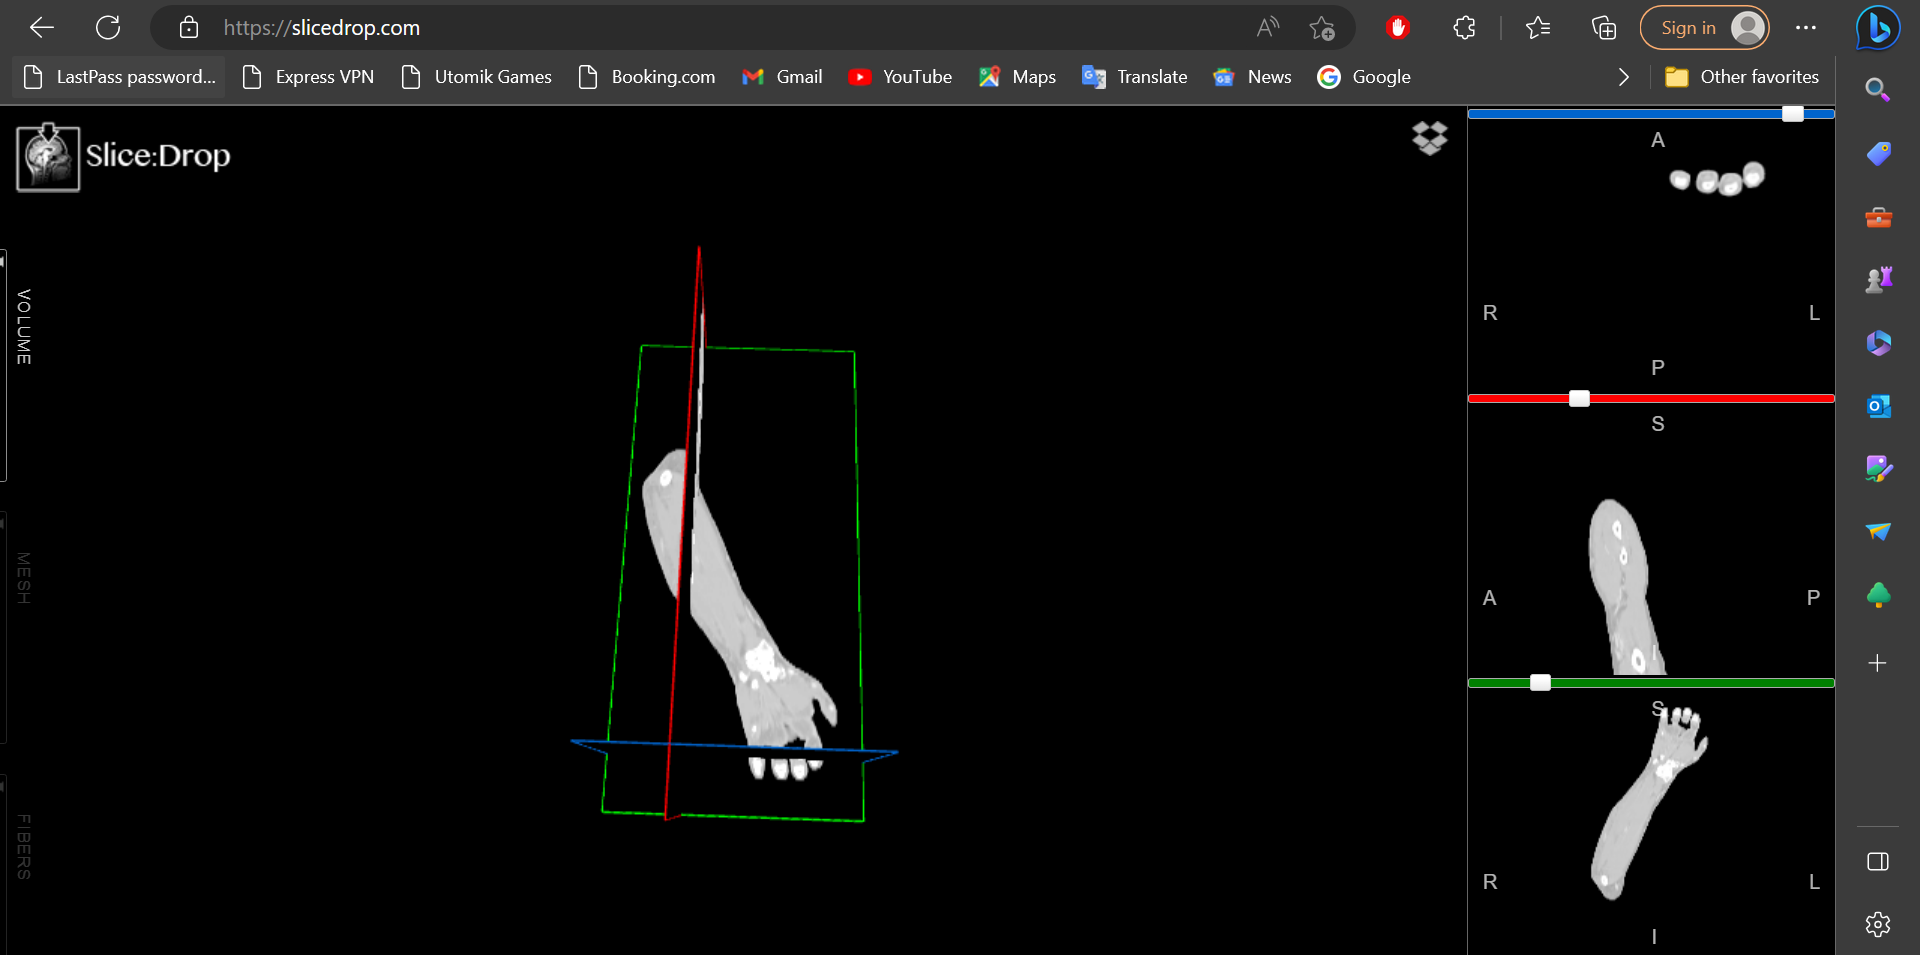

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

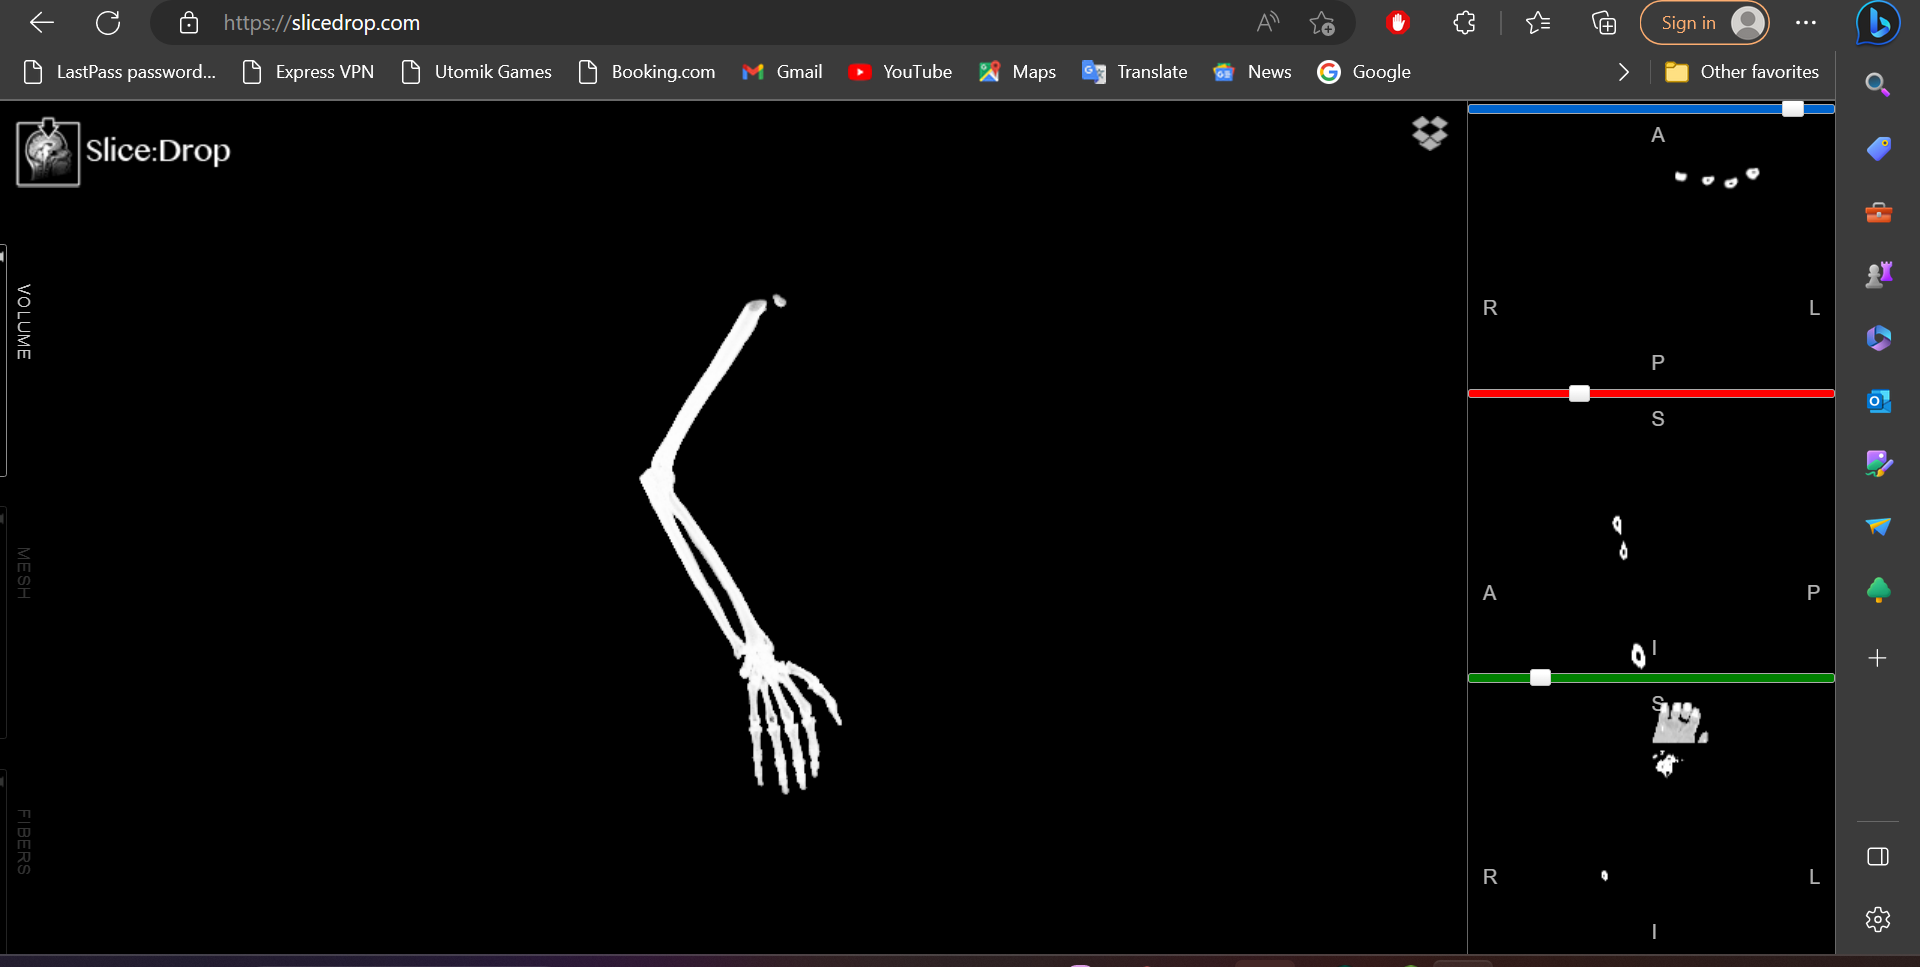

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [68]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [69]:
from pydicom import dcmread
import matplotlib.pyplot as plt


In [ ]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [70]:
from numpy.core.multiarray import dtype
import os
#import pydicom

DIR = "/content/ct"

files = os.listdir(DIR)
files.sort()

dicom = dcmread(DIR+"/"+ files[0])

numpy_array = np.zeros((len(files), dicom.Rows, dicom.Columns), dtype = np.int32)


for i, file in enumerate(files):
    dicom = dcmread(DIR+"/"+ file)
    hu_pixels = dicom.pixel_array
    numpy_array[i, :, :]= hu_pixels
    

# Print the shape of the 3D numpy array
print("Shape: ", hu_pixels.shape)

Shape:  (454, 512)


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [ ]:
# TODO: YOUR CODE FOR AXIAL

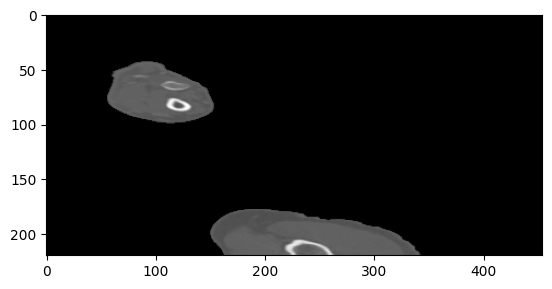

In [71]:
plt.imshow(numpy_array[:, :, 260], cmap='gray')
plt.show()

In [ ]:
# TODO: YOUR CODE FOR SAGITTAL

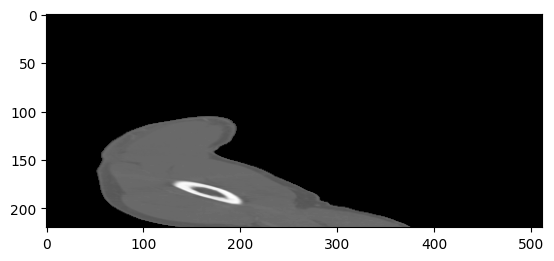

In [72]:
plt.imshow(numpy_array[:, 195, :], cmap='gray')
plt.show()

In [ ]:
# TODO: YOUR CODE FOR CORONAL

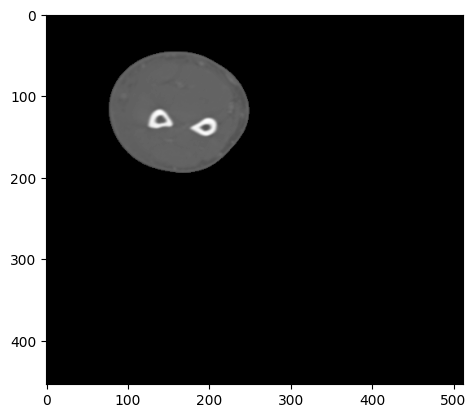

In [73]:
plt.imshow(numpy_array[105, :, :], cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [ ]:
# TODO: YOUR CODE

Window:   410
Level:   30
VMin: -175.0
VMax: 235.0
Rescale: -1024


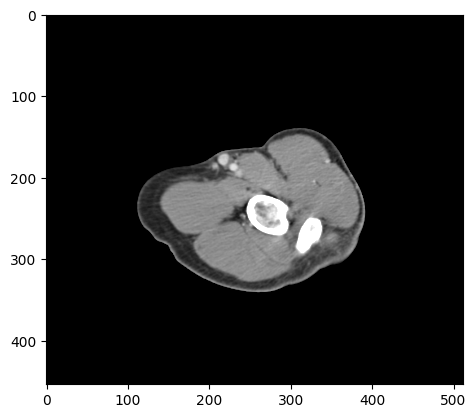

In [74]:
window = dicom.WindowWidth
print("Window:  ", window)
level = dicom.WindowCenter
print("Level:  ", level)

vmin = level - window/2
print("VMin:", vmin)
vmax = level + window/2
print("VMax:", vmax)
rescale = dicom.RescaleIntercept
print("Rescale:", rescale)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [ ]:
# TODO: YOUR CODE

VMin: 215
VMax: 225
Rescale: -1024


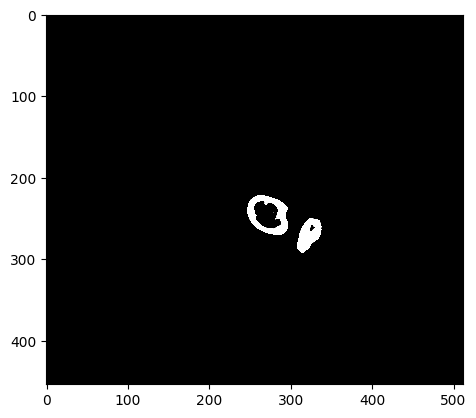

In [75]:

vmin = 215
print("VMin:", vmin)
vmax = 225
print("VMax:", vmax)
rescale = dicom.RescaleIntercept
print("Rescale:", rescale)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

Yes, Hounsfield value of bones are greater than fats, tissues and skin. Hence, I gave values such that the fat, tissues and skin are filtered out and only the bones are clearly visible.

In [ ]:
#hu of bones is > fats tissues and skin

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT

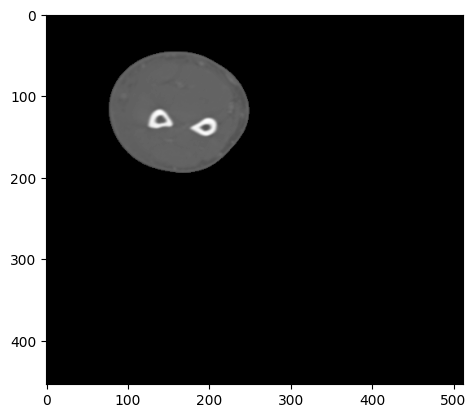

In [81]:
fat_minimum = -30
fat_maximum = -70

fat_mask = numpy_array.copy()
fat_mask[(fat_mask < fat_minimum) & (fat_mask > fat_maximum)] = 0

fat_mask = fat_mask.astype(np.int16)


plt.imshow(numpy_array[:,:,260], cmap='gray')
plt.imshow(fat_mask[:,:,260], alpha=1, cmap='gray')
plt.imshow(numpy_array[:,195,:], cmap='gray')
plt.imshow(fat_mask[:,195,:], alpha=1, cmap='gray')
plt.imshow(numpy_array[105,:,:], cmap='gray')
plt.imshow(fat_mask[105,:,:], alpha=1, cmap='gray')
plt.show()



#plt.imshow(numpy_array[], cmap='gray')

#plt.imshow(fat_mask[i], alpha=0.5, cmap='jet')
#plt.show()


In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

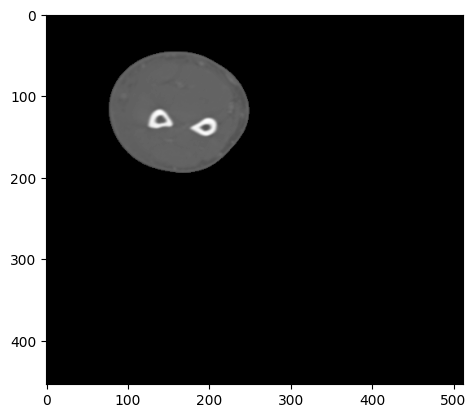

In [85]:
soft_tissue_minimum = 20
soft_tissue_maximum = 40

soft_tissue_mask = numpy_array.copy()
soft_tissue_mask[(soft_tissue_mask > soft_tissue_minimum) & (soft_tissue_mask < soft_tissue_maximum)] = 0
soft_tissue_mask = soft_tissue_mask.astype(np.int16)

plt.imshow(numpy_array[:,:,260], cmap='gray')
plt.imshow(soft_tissue_mask[:,:,260], alpha=1, cmap='gray')
plt.imshow(numpy_array[:,195,:], cmap='gray')
plt.imshow(soft_tissue_mask[:,195,:], alpha=1, cmap='gray')
plt.imshow(numpy_array[105,:,:], cmap='gray')
plt.imshow(soft_tissue_mask[105,:,:], alpha=1, cmap='gray')
plt.show()


#plt.imshow(numpy_array[i], cmap='gray')
#plt.imshow(soft_tissue_mask[i], alpha=0.5, cmap='jet')
#plt.show()



In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

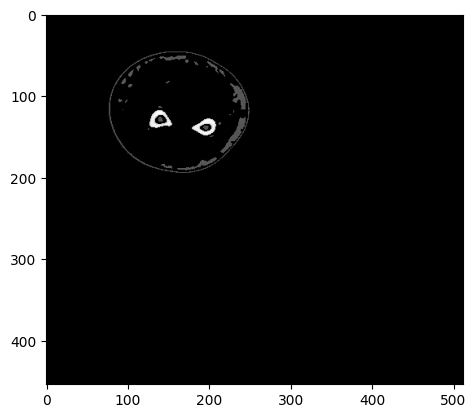

In [84]:
bone_min = 1000
bone_max = 2100
bone_mask = numpy_array.copy()
bone_mask[(bone_mask > bone_min) & (bone_mask < bone_max)] = 0
bone_mask = bone_mask.astype(np.int16)


plt.imshow(numpy_array[:,:,260], cmap='gray')
plt.imshow(bone_mask[:,:,260], alpha=1, cmap='gray')
plt.imshow(numpy_array[:,195,:], cmap='gray')
plt.imshow(bone_mask[:,195,:], alpha=1, cmap='gray')
plt.imshow(numpy_array[105,:,:], cmap='gray')
plt.imshow(bone_mask[105,:,:], alpha=1, cmap='gray')
plt.show()


#plt.imshow(numpy_array[i], cmap='gray')
#plt.imshow(bone_mask[i], alpha=0.5, cmap='jet')
#plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

Yes

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""